In [1]:
import matplotlib.pyplot as plt
from quasimode import variance
from quasimode.variance import VarianceDecompose
from quasimode import plot_util

rootfolder = '/home/yizaochen/codes/dna_rna/quasimode_pnas16mer'
v1_id = '34'
v2_id = '1112'
start_mode = 1
end_mode = 5

### Part 1: Read DataFrame

In [2]:
v_agent_arr = VarianceDecompose(rootfolder, 'arna+arna')
df_arr = v_agent_arr.read_c2_doperator_dc_df(v1_id, v2_id)
v_agent_bdd = VarianceDecompose(rootfolder, 'bdna+bdna')
df_bdd = v_agent_bdd.read_c2_doperator_dc_df(v1_id, v2_id)

In [7]:
df_arr.head()

,Mode-ID,<c2>,dtheta_dc,dL_dc,domega_dc
0,1,484.665982,-0.005377,0.034285,-0.000100
1,2,390.721134,0.001420,-0.012407,-0.000249
2,3,237.670644,0.004027,0.040688,-0.006958
3,4,159.344202,-0.001098,0.030573,0.006053
4,5,115.443077,0.000463,0.012169,0.000402


### Part 2: Process data for plotting

In [3]:
d_data = {'top': dict(), 'bottom': dict()}
d_data['top']['left'] = variance.get_data_by_df_bend_angle(df_arr, start_mode, end_mode)
d_data['top']['right'] = variance.get_data_by_df_bend_angle(df_bdd, start_mode, end_mode)
d_data['bottom']['left'] = variance.get_data_by_df_contour_length(df_arr, start_mode, end_mode)
d_data['bottom']['right'] = variance.get_data_by_df_contour_length(df_bdd, start_mode, end_mode)

### Part 3: Plot

In [9]:
ylabels = {'bend': r'$(\theta_{i}^\prime)^2\left<c_{i}^{2}\right>$ ($\mathrm{rad}^{2}$)',
           'contourlength': r'$(L^{\prime}_{i})^{2}\left<c_{i}^{2}\right>$   ($\mathrm{\AA}^{2}$)'}

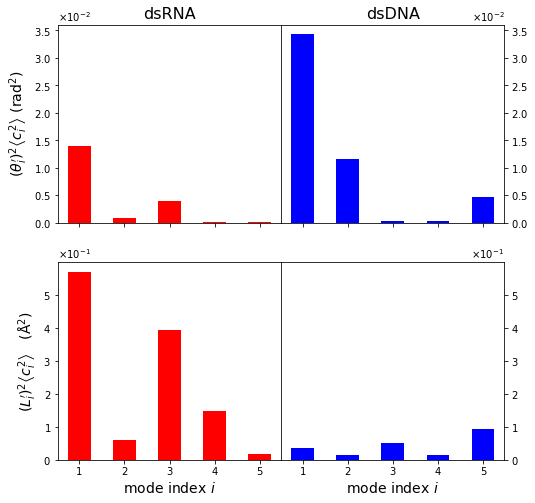

In [11]:
fig = plt.figure(figsize=(8,8))
d_axes = plot_util.make_grid_and_get_axes_dict(fig)
xlist = range(1,6)
w = 0.5
ttfz = 16
lbfz = 14

# top left
ax = d_axes['top']['left']
ylist = d_data['top']['left']
ax.bar(xlist, ylist, w, color='red')
ax.set_title('dsRNA', fontsize=ttfz)
ax.tick_params(axis='x', which='both', labelbottom=False)
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
ax.set_ylabel(ylabels['bend'], fontsize=lbfz)

# top right
ax = d_axes['top']['right']
ylist = d_data['top']['right']
ax.bar(xlist, ylist, w, color='blue')
ax.set_title('dsDNA', fontsize=ttfz)
ax.tick_params(axis='x', which='both', labelbottom=False)
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)

# bottom left
ax = d_axes['bottom']['left']
ylist = d_data['bottom']['left']
ax.bar(xlist, ylist, w, color='red')
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
ax.set_xlabel(r'mode index $i$', fontsize=lbfz)
ax.set_ylabel(ylabels['contourlength'], fontsize=lbfz)

# bottom right
ax = d_axes['bottom']['right']
ylist = d_data['bottom']['right']
ax.bar(xlist, ylist, w, color='blue')
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
ax.set_xlabel(r'mode index $i$', fontsize=lbfz)

#plt.savefig('bending_stretching.svg')
plt.show()